## <center>Week 6: Simple 2-mode network Analysis</center>
### Import the required libraries

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from networkx.algorithms import bipartite as bi
import math

#### The data is available on the link 'http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat'. 
This data contains matrix 18x14 and information about rows and columns. The row index contains the names of women and columns names are the events E1, E2, ... E14.
### Load the data from the link and preprocess it to make suitable for further analysis


In [2]:
df= pd.read_csv("http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat")
df= df.iloc[37:,:]
matrix = df["DL"].values
mat =[]
for line in matrix:
        row = line.strip().split()
        mat.append([int(elem) for elem in row])
mat=np.matrix(mat)
women = ['EVELYN','LAURA','THERESA','BRENDA','CHARLOTTE',
         'FRANCES','ELEANOR','PEARL','RUTH','VERNE','MYRNA',
         'KATHERINE','SYLVIA','NORA','HELEN','DOROTHY','OLIVIA','FLORA']
columns = ['E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','E11','E12','E13','E14']
df=pd.DataFrame(mat, columns=columns, index = women)
df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
EVELYN,1,1,1,1,1,1,0,1,1,0,0,0,0,0
LAURA,1,1,1,0,1,1,1,1,0,0,0,0,0,0
THERESA,0,1,1,1,1,1,1,1,1,0,0,0,0,0
BRENDA,1,0,1,1,1,1,1,1,0,0,0,0,0,0
CHARLOTTE,0,0,1,1,1,0,1,0,0,0,0,0,0,0
FRANCES,0,0,1,0,1,1,0,1,0,0,0,0,0,0
ELEANOR,0,0,0,0,1,1,1,1,0,0,0,0,0,0
PEARL,0,0,0,0,0,1,0,1,1,0,0,0,0,0
RUTH,0,0,0,0,1,0,1,1,1,0,0,0,0,0
VERNE,0,0,0,0,0,0,1,1,1,0,0,1,0,0


#### Now the data is a pandas dataframe df whose index are the names of the women and column names are the events
### Create a 2-mode network graph object using the dataframe df

In [3]:
G = nx.Graph()
G.add_nodes_from(df.index, bipartite=0)
G.add_nodes_from(df.columns, bipartite=1)
for woman in df.index:
    for event in df.columns:
        if df.loc[woman, event] == 1:
            G.add_edge(woman, event)

### Plot the network 

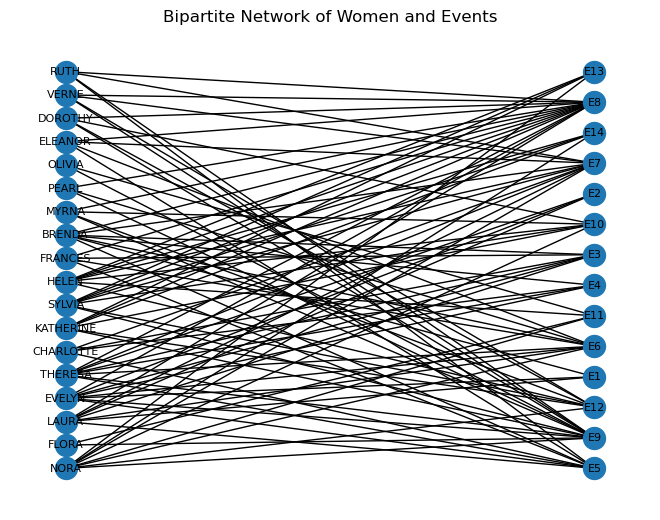

In [4]:
pos = nx.bipartite_layout(G, df.index)
nx.draw(G, pos, with_labels=True, node_size=250, font_size=8)
plt.title("Bipartite Network of Women and Events")
plt.show()

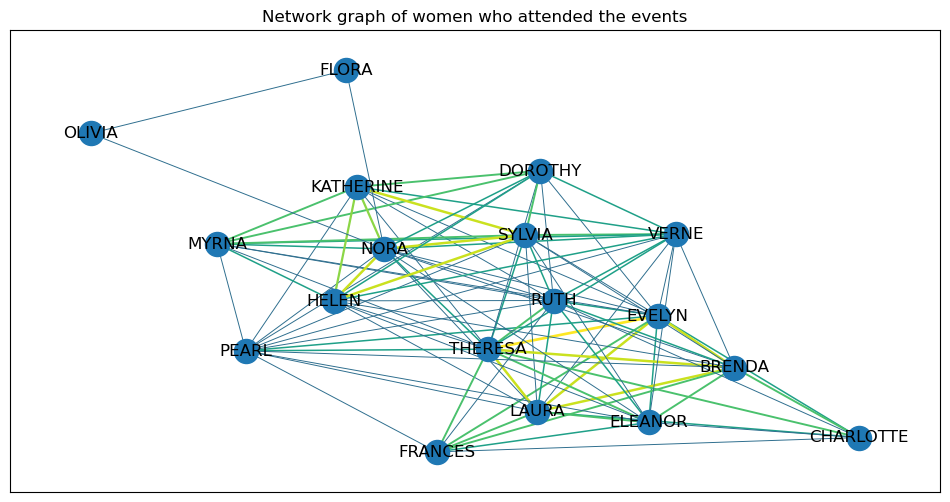

In [5]:
women_net=bi.weighted_projected_graph(G, women, ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in women_net.edges(data=True)]
plt.figure(figsize=[12,6])
nx.draw_networkx(women_net,width=weights, edge_color=weights)
plt.title("Network graph of women who attended the events")
plt.show()

### Interpretation: 
The graph suggests that the some women who attend the same events might knew each other and yellow lines shows their connections. 
The color of edges depends on how much they recognize or knew each other. Theresa, Evelyn , Laura and Brenda might be friends and they might be core in their group. Similarly, Katherine, Nora, Sylvia and Helen might be friends who attend the events together. They also might be influencers on other in their group. 